## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
#data tools
import numpy as np
import pandas as pd

#vis tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#stats tools
import statsmodels.api as sm
import statsmodels.formula.api as smf

#optional settings
pd.set_option('display.max_rows',60)
pd.set_option('display.max_columns',60)

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,0.104553,0.305358,0,0.000,0.000,0.000,4.540
word_freq_address,4601,0.213015,1.290575,0,0.000,0.000,0.000,14.280
word_freq_all,4601,0.280656,0.504143,0,0.000,0.000,0.420,5.100
word_freq_3d,4601,0.065425,1.395151,0,0.000,0.000,0.000,42.810
word_freq_our,4601,0.312223,0.672513,0,0.000,0.000,0.380,10.000
word_freq_over,4601,0.095901,0.273824,0,0.000,0.000,0.000,5.880
word_freq_remove,4601,0.114208,0.391441,0,0.000,0.000,0.000,7.270
word_freq_internet,4601,0.105295,0.401071,0,0.000,0.000,0.000,11.110
word_freq_order,4601,0.090067,0.278616,0,0.000,0.000,0.000,5.260
word_freq_mail,4601,0.239413,0.644755,0,0.000,0.000,0.160,18.180


In [4]:
spam_data.info()
#looks clean, 4601 entries for all cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


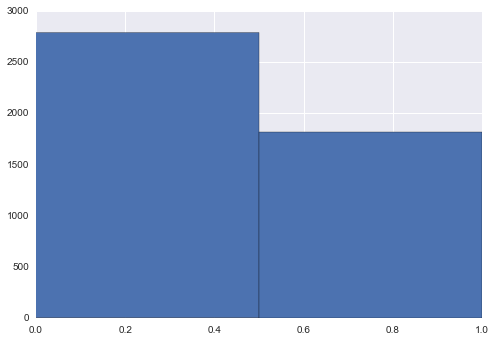

In [5]:
spam_data.is_spam.hist(bins=2)
#1 indicates spam

In [6]:
#view cols with high correlation to spam
df_corrSpam = pd.DataFrame(spam_data.corr()['is_spam'])
df_corrSpam.sort(columns='is_spam', ascending=False, inplace=True)

#corrSpamArray = df_corrSpam['is_spam']
df_corrSpam.head(15)

,is_spam
is_spam,1.000000
word_freq_your,0.383234
word_freq_000,0.334787
word_freq_remove,0.332117
char_freq_$,0.323629
word_freq_you,0.273651
word_freq_free,0.263215
word_freq_business,0.263204
capital_run_length_total,0.249164
word_freq_our,0.241920


In [7]:
#view tail for correlation w/ NOT spam
df_corrSpam.tail(15)

,is_spam
word_freq_pm,-0.122831
word_freq_telnet,-0.126912
word_freq_lab,-0.133523
word_freq_original,-0.135664
word_freq_technology,-0.136134
word_freq_meeting,-0.136615
word_freq_re,-0.140408
word_freq_edu,-0.146138
word_freq_85,-0.149225
word_freq_650,-0.158800


11.11


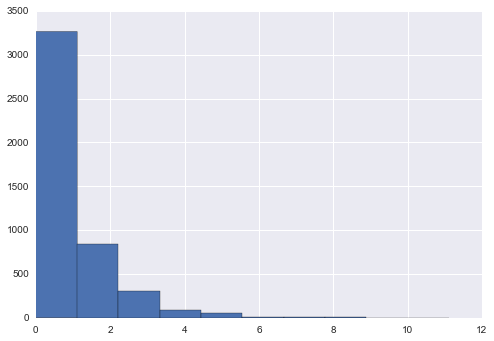

In [8]:
print spam_data.word_freq_your.max()
spam_data.word_freq_your.hist()
#sns.factorplot("word_freq_your", data=spam_data, hue="is_spam")

#how can max for word count be a decimal?

5.45


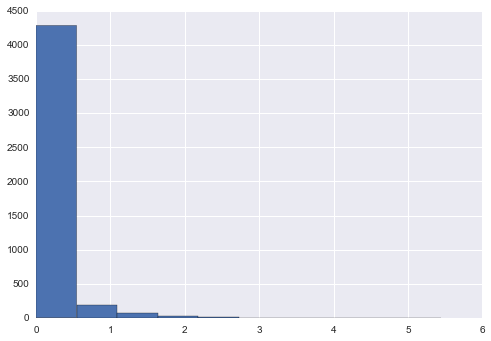

In [9]:
print spam_data.word_freq_000.max()
spam_data.word_freq_000.hist()
#sns.factorplot("word_freq_your", data=spam_data, hue="is_spam")

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [10]:
spam_data.capital_run_length_longest.describe()

count    4601.000000
mean       52.172789
std       194.891310
min         1.000000
25%         6.000000
50%        15.000000
75%        43.000000
max      9989.000000
Name: capital_run_length_longest, dtype: float64

####Split Data


In [11]:
y = spam_data['is_spam']

In [12]:
df_e2 = pd.DataFrame( spam_data['capital_run_length_longest'])
df_e2.head(1)


,capital_run_length_longest
0,61


In [13]:
#split data for cross-validation test
from sklearn.cross_validation import train_test_split

In [14]:
#split data
X_train, X_test, y_train, y_test = train_test_split( 
    df_e2, y, 
    test_size=0.3, random_state=12)

####Model Ex 2 

In [15]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()

In [16]:
#log_reg_e2.fit? #( X, y)
mdl.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [17]:
mdl.score( X_test, y_test)

0.73207820419985514

In [18]:
mdl.coef_

array([[ 0.02463169]])

In [19]:
#see prediction
y_hat = mdl.predict( X_test)

In [20]:
y_hat

array([1, 0, 0, ..., 1, 0, 0])

In [21]:
#interpret clf LogisticRegression Model
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix( y_test, y_hat)
#http://en.wikipedia.org/wiki/Confusion_matrix
#rows - actual class
#cols - predicted class

array([[790,  65],
       [305, 221]])

In [23]:
print classification_report(y_test, y_hat)

#classification_report?
'''
Interpreting Classification Report
 precision - NOT lable POS sample that is negative - 
 recall    - Ability to find ALL positive samples
 fl-score  - weighted measure of 'precision' and 'recall' 1 = best, 0 = worst
 support   - ???

http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures
'''

             precision    recall  f1-score   support

          0       0.72      0.92      0.81       855
          1       0.77      0.42      0.54       526

avg / total       0.74      0.73      0.71      1381



"\nInterpreting Classification Report\n precision - NOT lable POS sample that is negative - \n recall    - Ability to find ALL positive samples\n fl-score  - weighted measure of 'precision' and 'recall' 1 = best, 0 = worst\n support   - ???\n\nhttp://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures\n"

In [24]:
'''
MAE is not appropriate for binary variable
#MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_hat)
#mean_absolute_error?
'''

'\nMAE is not appropriate for binary variable\n#MAE\nfrom sklearn.metrics import mean_absolute_error\n\nmean_absolute_error(y_test, y_hat)\n#mean_absolute_error?\n'

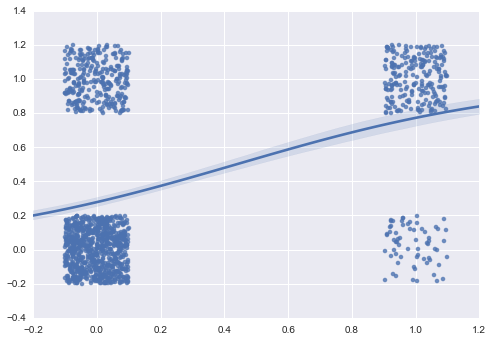

In [25]:
sns.regplot( y_hat, y_test, x_jitter=0.1, y_jitter=0.2, logistic=True)

In [26]:
y_hat_df = pd.DataFrame(mdl.predict_proba(X_test))
y_hat_df.head(3)

,0,1
0,2.309869e-08,1.000000
1,6.775399e-01,0.322460
2,7.190072e-01,0.280993


In [27]:
y_hat_df.rename(columns={0:'no',1:'yes'}, inplace=True)
y_hat_df['y_hat'] = y_hat
y_hat_df['y_true'] = y_test

y_hat_df.head(5)

,no,yes,y_hat,y_true
0,2.309869e-08,1.000000,1,1
1,6.775399e-01,0.322460,0,0
2,7.190072e-01,0.280993,0,0
3,7.239568e-01,0.276043,0,0
4,7.384773e-01,0.261523,0,0


[(0, 1.1)]

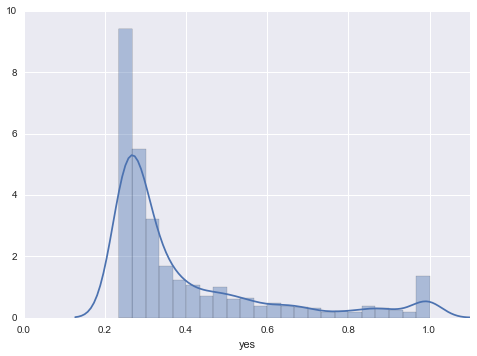

In [28]:
#map y_hat values
fg = sns.distplot( y_hat_df['yes'])
fg.set(xlim=(0,1.1))

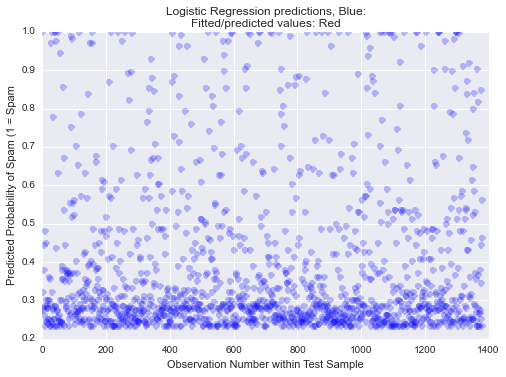

In [88]:
plt.plot( y_hat_df.index, y_hat_df['yes'],
         'bo', alpha=0.25)
plt.title('Logistic Regression predictions, Blue: \nFitted/predicted values: Red')
plt.xlabel('Observation Number within Test Sample')
plt.ylabel('Predicted Probability of Spam (1 = Spam')


#how to add red line w/ cutoff point

#### Question: how to add red line representing cutoff point for Logistic Reg prob

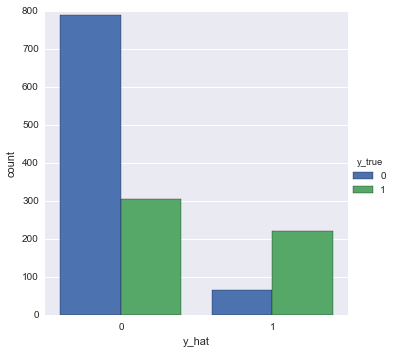

In [30]:
#visual confusion matrix, FAR-LEFT, and FAR-RIGHT are correct predictions
sns.factorplot('y_hat', data=y_hat_df, hue='y_true')

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [31]:
#create array 
df_x_cols = spam_data.drop(['is_spam'], axis=1)
df_x_cols.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278


In [32]:
#add constant
df_x_cols = sm.tools.add_constant(df_x_cols)
df_x_cols.head(1)

,const,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278


In [33]:
#your code here
x_cols = list(df_x_cols.columns.values)
print x_cols


['const', 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#'

####Split Data

In [34]:
#split data
X_train, X_test, y_train, y_test = train_test_split( 
    df_x_cols, y, 
    test_size=0.3, random_state=12)

In [35]:
'''
#defined previously
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
'''

'\n#defined previously\nfrom sklearn.linear_model import LogisticRegression\nmdl = LogisticRegression()\n'

In [36]:
mdl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [37]:
mdl.score(X_test, y_test)
#much better ... risk of overfitting with so many variables?

0.93265749456915281

In [38]:
mdl.coef_

array([[ -7.09495888e-01,  -4.24447276e-01,  -1.54943039e-01,
          1.09129902e-01,   8.02256108e-01,   7.86274549e-01,
          7.74990349e-01,   1.89200169e+00,   4.28068810e-01,
          5.14943737e-01,   3.75252815e-01,  -5.62000920e-02,
         -2.31003427e-01,  -4.54337939e-02,   2.28009839e-01,
          5.81025572e-01,   9.09780023e-01,   7.92442222e-01,
          1.02983278e-01,   6.97376283e-02,   7.33070824e-01,
          3.14267058e-01,   3.30796459e-01,   2.20405689e+00,
          3.11268667e-01,  -2.09404022e+00,  -9.02427955e-01,
         -3.16482870e+00,   2.59415851e-01,  -1.46332945e+00,
         -7.81042774e-01,  -3.92128297e-01,  -6.06143288e-02,
         -7.30411167e-01,  -2.11843692e-01,  -8.47441042e-01,
          8.55989647e-01,   1.03603914e-02,  -5.27081497e-01,
         -6.16741247e-01,  -2.21486086e-01,  -1.06927302e+00,
         -1.92322112e+00,  -6.36077043e-01,  -1.46091060e+00,
         -7.27451120e-01,  -1.75400965e+00,  -9.39191344e-01,
        

In [39]:
#see prediction
y_hat = mdl.predict( X_test)
y_hat

array([1, 0, 0, ..., 1, 1, 0])

In [40]:
'''
#interpret clf LogisticRegression Model
from sklearn.metrics import confusion_matrix, classification_report
'''

'\n#interpret clf LogisticRegression Model\nfrom sklearn.metrics import confusion_matrix, classification_report\n'

[[813  42]
 [ 51 475]]


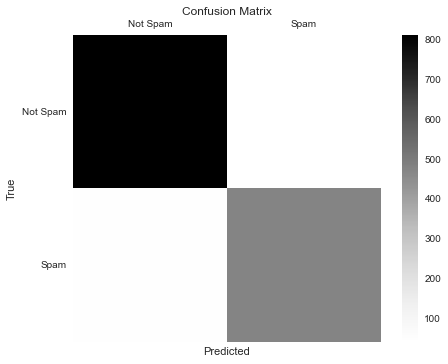

In [87]:
#confusion matrix ( true, pred, labels) 
#fmt: http://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

#lables
cm_labels = ['Not Spam','Spam']

cm = confusion_matrix( y_test, y_hat )
print(cm)

#fmt
fg = plt.figure()
ax = fg.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
plt.grid(False)  #(color='white', linestyle='dashed')
fg.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
ax.set_xticklabels(['']+ cm_labels)
ax.set_yticklabels(['']+ cm_labels)
plt.show()

#confusion_matrix?

In [42]:
print classification_report( y_test, y_hat)
print classification_report( y_test, y_hat, target_names=["Not Spam","Spam"])

#classification_report?

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       855
          1       0.92      0.90      0.91       526

avg / total       0.93      0.93      0.93      1381

             precision    recall  f1-score   support

   Not Spam       0.94      0.95      0.95       855
       Spam       0.92      0.90      0.91       526

avg / total       0.93      0.93      0.93      1381



In [43]:
#with all variables, predictions are pretty good

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your data

#### Use crossvalidation to score model

In [44]:
#ref HW2
from sklearn.cross_validation import cross_val_score

xvalidation_score = cross_val_score(mdl, df_x_cols, y, cv=10)
print xvalidation_score

#cross_val_score?

[ 0.92841649  0.92190889  0.9175705   0.94565217  0.9326087   0.93478261
  0.95434783  0.93913043  0.8496732   0.8540305 ]


In [45]:
print xvalidation_score.mean()
#Results ~.92

0.917812132136


#### Question: cross-validation interpretation
##### With 10 folds... we see the first 7 that were trained on and the last 3 are the test data? (
##### Hence, the last 3 (particularly the last 2) perform worse


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

#### Prepare Data

In [46]:
#scale data
from sklearn.preprocessing import scale

In [47]:
#assuming that CATEGORICAL DATA can be scaled w/o messing with results
spam_data_scaled = pd.DataFrame( scale(spam_data),columns=spam_data.columns.values)
spam_data_scaled.drop(['is_spam'],axis=1,inplace=True)
spam_data_scaled.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324


In [48]:
spam_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601,1.853187e-17,1.000109,-0.342434,-0.342434,-0.342434,-0.342434,14.526998
word_freq_address,4601,2.779780e-17,1.000109,-0.165072,-0.165072,-0.165072,-0.165072,10.900965
word_freq_all,4601,2.470916e-17,1.000109,-0.556761,-0.556761,-0.556761,0.276427,9.560519
word_freq_3d,4601,0.000000e+00,1.000109,-0.046900,-0.046900,-0.046900,-0.046900,30.641278
word_freq_our,4601,4.941832e-17,1.000109,-0.464314,-0.464314,-0.464314,0.100792,14.406908
word_freq_over,4601,3.706374e-17,1.000109,-0.350266,-0.350266,-0.350266,-0.350266,21.125709
word_freq_remove,4601,-2.470916e-17,1.000109,-0.291794,-0.291794,-0.291794,-0.291794,18.282611
word_freq_internet,4601,0.000000e+00,1.000109,-0.262562,-0.262562,-0.262562,-0.262562,27.441249
word_freq_order,4601,2.470916e-17,1.000109,-0.323302,-0.323302,-0.323302,-0.323302,18.557789
word_freq_mail,4601,1.235458e-17,1.000109,-0.371364,-0.371364,-0.371364,-0.123181,27.828440


In [49]:
#split data for KNN
X_train, X_test, y_train, y_test = train_test_split( 
    spam_data_scaled, y, 
    test_size=0.3, random_state=12)

#### Find ideal KNN

In [50]:
from sklearn import neighbors, datasets, feature_selection

In [51]:
#create null array to append KNN
scores = []

In [52]:
n_neighbors = range(1, 51, 2)
#range( low, min, skip) 
#want odd-number KKs to avoid possiblity of a tie with binary choices

In [53]:
#loop through neighbors
for n in n_neighbors: 
    knn_mdl = neighbors.KNeighborsClassifier(n)
    knn_mdl.fit(X_train, y_train)
    scores.append( knn_mdl.score(X_test, y_test))
                  

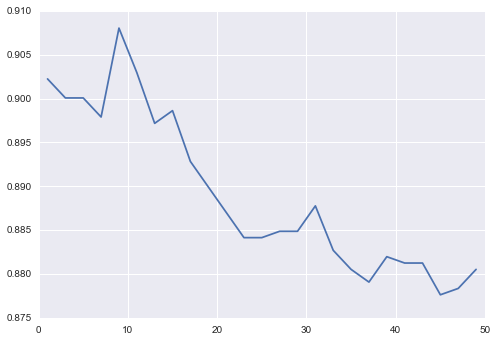

In [54]:
plt.figure()
_ = plt.plot(n_neighbors, scores)

In [55]:
#output to identify max
df_knn_scores = pd.DataFrame(zip(n_neighbors,scores),columns=['neighbors','score'])
df_knn_scores.head(2)

,neighbors,score
0,1,0.902245
1,3,0.900072


In [56]:
df_knn_scores.sort('score', inplace=True, ascending=False)
df_knn_scores.head(2)

,neighbors,score
4,9,0.908038
5,11,0.902969


In [57]:
#9 is best score for neighbors but only slightly better than others in range (scale of axis is small)

#### Cross Validate KNN to compare accuracy vs LogisticRegression

In [58]:
#apply cross validation
from sklearn.cross_validation import cross_val_score
knn_mdl = neighbors.KNeighborsClassifier(9, weights='uniform') #what are args? uniform?
xvalidation_score_knn = cross_val_score(knn_mdl, spam_data_scaled, y, cv=10) #using 10-cross folds b/c dataset is big
print xvalidation_score_knn

[ 0.87635575  0.9175705   0.89804772  0.90869565  0.92173913  0.92391304
  0.92391304  0.89347826  0.8453159   0.82788671]


In [59]:
xvalidation_score_knn.mean()
#KNN ~.89 ==> Regresion is slighty better than KNN on this problem

0.89369157144451028

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

#### Logistic Regression Feature Importance

In [91]:
feature_importance_logreg_df = pd.DataFrame(zip(df_x_cols.columns, np.transpose(mdl.coef_) ),
                              columns=['param','coef'])
feature_importance_logreg_df.head(3)

,param,coef
0,const,[-0.152744772602]
1,word_freq_make,[-0.196205953281]
2,word_freq_address,[0.0541610998041]


In [94]:
feature_importance_logreg_df.sort('coef', inplace=True, ascending=False)
print feature_importance_logreg_df.head(5)
print feature_importance_logreg_df.tail(5)

                         param              coef
52                 char_freq_!   [1.58634826861]
3                word_freq_all   [1.06417725318]
53                 char_freq_$  [0.994945271662]
55  capital_run_length_average  [0.933534003917]
22              word_freq_font  [0.873824620958]
6               word_freq_over  [0.823337226562]
15         word_freq_addresses   [0.78378932514]
4                 word_freq_3d  [0.538509231965]
56  capital_run_length_longest   [0.46263257093]
19               word_freq_you  [0.421619107099]
                 param               coef
44   word_freq_project  [-0.826348710211]
47     word_freq_table  [-0.935146622163]
43  word_freq_original  [-0.946482898538]
25        word_freq_hp  [-0.981359385564]
28       word_freq_650   [-1.20276306271]
40    word_freq_direct   [-1.47073255061]
41        word_freq_cs   [-1.53766041823]
45        word_freq_re   [-1.60981057972]
24     word_freq_money   [-2.80970703156]
26       word_freq_hpl   [-3.60363462045]

In [96]:
feature_importance_logreg_df['abs_coef'] = abs(feature_importance_logreg_df['coef'] ) 
feature_importance_logreg_df.sort('abs_coef', inplace=True, ascending=False)
feature_importance_logreg_df.head(5)

,param,coef,abs_coef
26,word_freq_hpl,[-3.60363462045],[3.60363462045]
24,word_freq_money,[-2.80970703156],[2.80970703156]
45,word_freq_re,[-1.60981057972],[1.60981057972]
52,char_freq_!,[1.58634826861],[1.58634826861]
41,word_freq_cs,[-1.53766041823],[1.53766041823]


In [108]:
nbr_features = np.arange(len( feature_importance_logreg_df.T.columns.values)) #need to transpose 
nbr_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56])

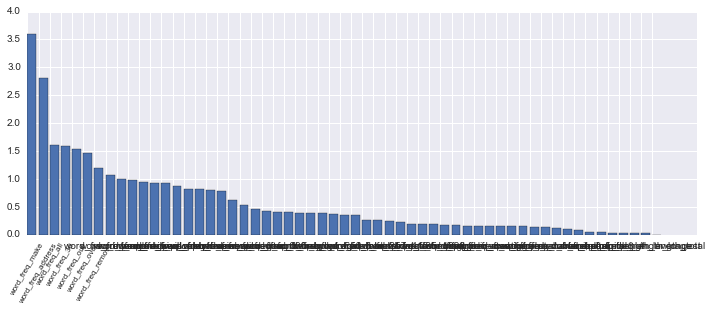

In [109]:
#nbr_features set above
fig = plt.figure( figsize=(12,4))

ax = fig.add_subplot(111)
#ax.bar( nbr_features, feature_selection.f_classif(spam_data_scaled, y)[0])
ax.bar( nbr_features, feature_importance_logreg_df['abs_coef']) 

#tick names
xticknames = ax.set_xticklabels( feature_importance_knn_df['feature'])
ax.set_xticks(nbr_features)
_ = plt.setp( xticknames, rotation=60, fontsize=8)

#_ = plt.setp?

####Question: odds ratio doesn't work for continuous variables ==> poor choice here ?

#### KNN Feature Importance

In [63]:
from sklearn import feature_selection

In [64]:
#how to get f-state for each feature in knn model?
#note f-stat does not chg w/ scale or un-scaled data
feature_selection.f_classif(spam_data_scaled, y)[0]

array([  7.44402002e+01,   4.20486534e+00,   1.85665407e+02,
         1.51874890e+01,   2.85890659e+02,   2.63060625e+02,
         5.70169634e+02,   2.05486673e+02,   2.60549947e+02,
         9.05575555e+01,   2.67687159e+02,   2.75584058e-01,
         8.27237861e+01,   1.66314064e+01,   1.83543361e+02,
         3.42346240e+02,   3.42316290e+02,   2.00128275e+02,
         3.72273985e+02,   1.71792881e+02,   7.91726012e+02,
         3.91378937e+01,   5.80534452e+02,   2.25314579e+02,
         3.24490814e+02,   2.63930408e+02,   1.60081358e+02,
         1.18975641e+02,   8.34813456e+01,   1.38688037e+02,
         7.52873239e+01,   6.07861899e+01,   6.71148189e+01,
         5.92223390e+01,   1.04743740e+02,   8.68404398e+01,
         1.50561998e+02,   4.43397784e+00,   7.04497135e+01,
         1.93935388e+01,   4.40244986e+01,   8.74670959e+01,
         8.62307208e+01,   4.15235569e+01,   9.24905639e+01,
         1.00361296e+02,   9.19876656e+00,   3.26966616e+01,
         1.64110039e+01,

In [65]:
#load df
feature_importance_knn_df = pd.DataFrame(zip(spam_data_scaled.columns.values.T,
                                             feature_selection.f_classif(spam_data_scaled, y)[0]), 
                                        columns=['feature','f_stat'] 
                                        )
feature_importance_knn_df.head(5)

#sort df
feature_importance_knn_df.sort('f_stat', inplace=True, ascending=False)
feature_importance_knn_df.head(5)


,feature,f_stat
20,word_freq_your,791.726012
22,word_freq_000,580.534452
6,word_freq_remove,570.169634
52,char_freq_$,538.029935
18,word_freq_you,372.273985


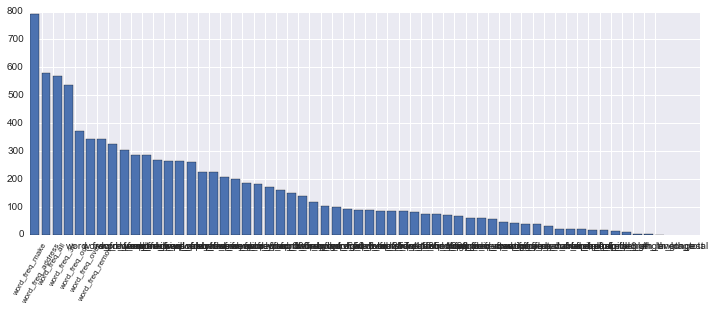

In [98]:
nbr_features = np.arange(len( spam_data_scaled.columns.values)) #scaled data 
fig = plt.figure( figsize=(12,4))

ax = fig.add_subplot(111)
#ax.bar( nbr_features, feature_selection.f_classif(spam_data_scaled, y)[0])
ax.bar( nbr_features, feature_importance_knn_df['f_stat'])

#tick names
xticknames = ax.set_xticklabels( feature_importance_knn_df['feature'])
ax.set_xticks(nbr_features)
_ = plt.setp( xticknames, rotation=60, fontsize=8)

#_ = plt.setp?

### QUESTION: 
why do xticknames only format some of of plot?

In [80]:
#print nbr_features
#print feature_importance_knn_df['feature']

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [110]:
'''#reference L12-Solutions ... Not Clear
def plot_roc_curve( target_test, target_pred_proba, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve( target_test, target_pred_proba[:, pos_label], pos_label) 
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot( [0,1],[0,1] , 'k--')
    plt.xlim( [0.0, 1.0] )
    plt.ylim( [0.0, 1.0] )
    plt.xlabel('False Positive Rate (1 - Specifity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receive Operating Characteristic')
    plt.legend(loc='lower right')
'''

In [115]:
#reference 12-Bayes-LectureNotes
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

In [117]:
probas_ = mdl.fit( X_train, y_train).predict_proba(X_test)
probas_

array([[  1.53676830e-05,   9.99984632e-01],
       [  9.93076848e-01,   6.92315153e-03],
       [  1.00000000e+00,   3.66809717e-24],
       ..., 
       [  1.66065314e-03,   9.98339347e-01],
       [  8.04158780e-04,   9.99195841e-01],
       [  9.95114236e-01,   4.88576413e-03]])

In [120]:
#Compute ROC cuver and area of the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
roc_auc = auc(fpr,tpr)
print 'Area under ROC curve %f' % roc_auc

Area under ROC curve 0.967338


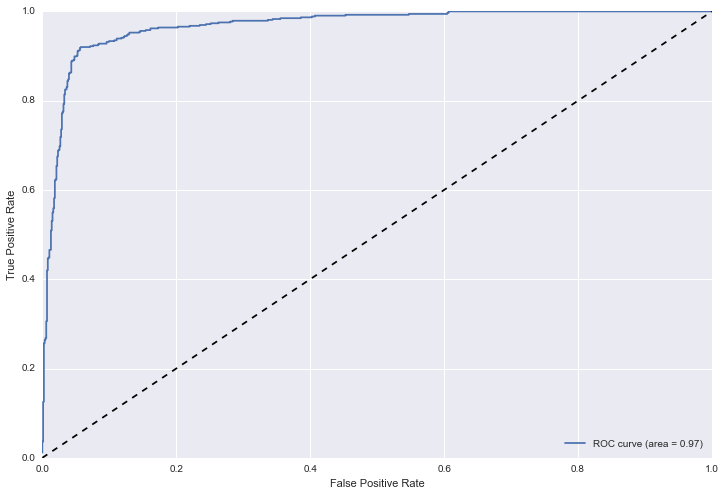

In [121]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

####QUESTION: how to interpret ROC curve
new reference materials?

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [69]:
#Your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [70]:
#your discussion here

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [71]:
#ref 14-PCA_lab-RH

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) #2D: 18%, 5D: 28%
pca.fit(X_train)

PCA(copy=True, n_components=2, whiten=True)

In [137]:
#NPCA normalizes and whitens the data PROOF
X_pca = pca.transform(X_train)
print 'X_pca mean: ', np.round(X_pca.mean(axis=0), decimals=5)
print 'X_pca std: ',np.round(X_pca.std(axis=0), decimals=5)

X_pca mean:  [-0.  0.]
X_pca std:  [ 1.  1.]


In [126]:
#pca.components_

In [130]:
pca.explained_variance_ratio_

array([ 0.12294059,  0.06058983])

In [131]:
pca.explained_variance_ratio_.sum()

0.18353042277032167

In [138]:
#your PCA visualization here

from itertools import cycle

In [139]:
#
def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

In [140]:
#set target_names
target_names = ['Not Spam','Spam']
target_names

['Not Spam', 'Spam']

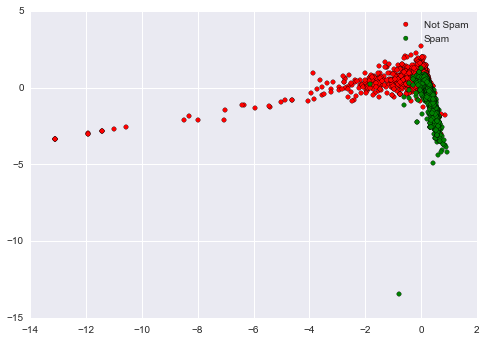

In [141]:
#plot: note using PCA-Transform(x_train), y_train
plot_PCA_2D(X_pca, y_train,target_names)